In [171]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest

## Importing Dataset

In [3]:
df = pd.read_csv('classification_data.csv')
df.head()

,Unnamed: 0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_1,Chance of Admit
0,0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,True,1
1,1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,True,1
2,2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,True,0
3,3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,True,1
4,4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,False,0


In [4]:
X = df.drop(columns='Chance of Admit')
df_target = df['Chance of Admit']
df_target.head()

0    1
1    1
2    0
3    1
4    0
Name: Chance of Admit, dtype: int64

In [5]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (320, 9)
y_train (320,)
X_test (80, 9)
y_test (80,)


## KNN Classification 

### 1) K vs model performance metrics in train and test data.</li>


#### Defining functions for score cards for test and train

In [6]:
k = []
AUC_Score = []
Precision_Score = []
Recall_Score = []
Accuracy_Score = []
Kappa_Score = []
f1_score = []

def update_test_score_card(model, neighbour):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global k
    
    global AUC_Score 
    global Precision_Score
    global Recall_Score
    global Accuracy_Score
    global Kappa_Score
    global f1_score

    k.append(neighbour)
    Precision_Score.append(metrics.precision_score(y_test, y_pred))
    AUC_Score.append(metrics.roc_auc_score(y_test, y_pred))
    Recall_Score.append(metrics.recall_score(y_test, y_pred))
    Accuracy_Score.append(metrics.accuracy_score(y_test, y_pred))
    Kappa_Score.append(metrics.cohen_kappa_score(y_test, y_pred))
    f1_score.append(metrics.f1_score(y_test, y_pred))
    

In [7]:
k_train = []
AUC_Score_train = []
Precision_Score_train = []
Recall_Score_train = []
Accuracy_Score_train = []
Kappa_Score_train = []
f1_score_train = []

def update_train_score_card(model, neighbour):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict_proba(X_train)[:,1]

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global k_train
    global AUC_Score_train 
    global Precision_Score_train
    global Recall_Score_train
    global Accuracy_Score_train
    global Kappa_Score_train
    global f1_score_train

    k_train.append(neighbour)
    Precision_Score_train.append(metrics.precision_score(y_train, y_pred))
    AUC_Score_train.append(metrics.roc_auc_score(y_train, y_pred))
    Recall_Score_train.append(metrics.recall_score(y_train, y_pred))
    Accuracy_Score_train.append(metrics.accuracy_score(y_train, y_pred))
    Kappa_Score_train.append(metrics.cohen_kappa_score(y_train, y_pred))
    f1_score_train.append(metrics.f1_score(y_train, y_pred))
    

#### Generating score cards for test and train data

In [8]:
# train score card

for i in range(1,21,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    update_train_score_card(knn, i)
train_score_card = pd.DataFrame({'K': k_train,
                                    'AUC Score' : AUC_Score_train,
                                    'Precision Score': Precision_Score_train,
                                    'Recall Score': Recall_Score_train,
                                    'Accuracy Score': Accuracy_Score_train,
                                    'Kappa Score':Kappa_Score_train,
                                    'f1-score': f1_score_train })
train_score_card

,K,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2,0.952247,0.893082,1.000000,0.946875,0.893675,0.943522
2,3,0.947935,0.956522,0.929577,0.950000,0.898429,0.942857
3,4,0.913554,0.859873,0.950704,0.909375,0.818367,0.903010
4,5,0.859946,0.909836,0.781690,0.868750,0.730294,0.840909
5,6,0.869877,0.858156,0.852113,0.871875,0.740280,0.855124
6,7,0.823350,0.880342,0.725352,0.834375,0.658423,0.795367
7,8,0.787585,0.765957,0.760563,0.790625,0.575580,0.763251
8,9,0.764203,0.852941,0.612676,0.781250,0.543900,0.713115
9,10,0.776943,0.808333,0.683099,0.787500,0.562701,0.740458


In [9]:
# build the model on train data (X_train and y_train)
# using fit() to fit the KNN regression model

# test score card
for i in range(1,21,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    update_test_score_card(knn, i)
test_score_card = pd.DataFrame({'K': k,
                                    'AUC Score' : AUC_Score,
                                    'Precision Score': Precision_Score,
                                    'Recall Score': Recall_Score,
                                    'Accuracy Score': Accuracy_Score,
                                    'Kappa Score':Kappa_Score,
                                    'f1-score': f1_score })
test_score_card

,K,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,1,0.785088,0.800000,0.736842,0.787500,0.572327,0.767123
1,2,0.765038,0.720930,0.815789,0.762500,0.526775,0.765432
2,3,0.770677,0.812500,0.684211,0.775000,0.545455,0.742857
3,4,0.736216,0.729730,0.710526,0.737500,0.473024,0.720000
4,5,0.732456,0.774194,0.631579,0.737500,0.469027,0.695652
5,6,0.709900,0.714286,0.657895,0.712500,0.421384,0.684932
6,7,0.716792,0.807692,0.552632,0.725000,0.440204,0.656250
7,8,0.683584,0.696970,0.605263,0.687500,0.369483,0.647887
8,9,0.665414,0.750000,0.473684,0.675000,0.336735,0.580645
9,10,0.656015,0.689655,0.526316,0.662500,0.315589,0.597015


<h4>Train score vs Test data</h4>

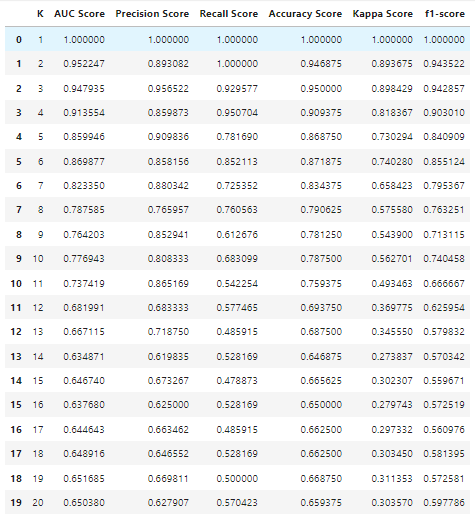</img>
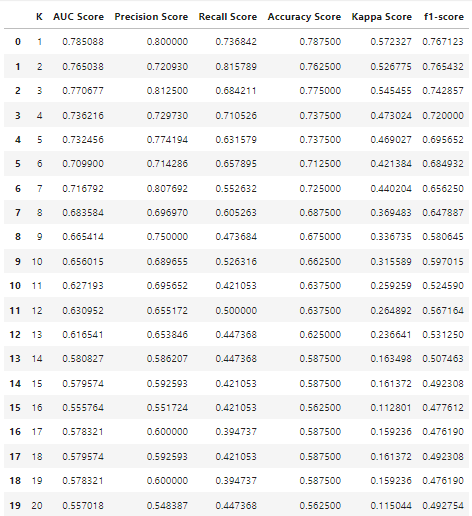</img>

<li>We can observe that the model is overfit when the K is low. 
<li>The variance is high
<li>But, as the complexity of the model is reduced, that is, increasing K value yeilds in better model.

### 2) Study effect of threshold on precision, recall and F1 score

#### Defining function to generate score card

In [10]:
threshold_2 = []
Precision_Score_2 = []
Recall_Score_2 = []
f1_score_2 = []

def q2_score_card(model, t):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < t else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global threshold_2
    global Precision_Score_2
    global Recall_Score_2
    global f1_score_2

    threshold_2.append(t)
    Precision_Score_2.append(metrics.precision_score(y_test, y_pred))
    Recall_Score_2.append(metrics.recall_score(y_test, y_pred))
    f1_score_2.append(metrics.f1_score(y_test, y_pred))
    

#### Generating score card

In [11]:
# train score card

for i in np.linspace(0,1,11):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    q2_score_card(knn, i)
q2_score_card = pd.DataFrame({'threshold': threshold_2,
                                    'Precision Score': Precision_Score_2,
                                    'Recall Score': Recall_Score_2,
                                    'f1-score': f1_score_2 })
q2_score_card

,threshold,Precision Score,Recall Score,f1-score
0,0.000000,0.475000,1.000000,0.644068
1,0.100000,0.515152,0.894737,0.653846
2,0.200000,0.515152,0.894737,0.653846
3,0.300000,0.690476,0.763158,0.725000
4,0.400000,0.690476,0.763158,0.725000
5,0.500000,0.774194,0.631579,0.695652
6,0.600000,0.875000,0.368421,0.518519
7,0.700000,0.875000,0.368421,0.518519
8,0.800000,0.875000,0.368421,0.518519
9,0.900000,0.777778,0.184211,0.297872


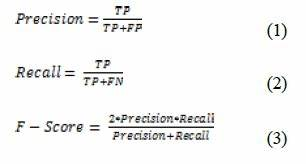

<li><b>Precision:</b> Precision indicates how precisely the positives in the data are predicted <p>We can observe from the report that the precision is lowest when the threshold is set to 0, and <u>highest when precision is  around 0.7.</u> This metric can be used for imbalanced data and when the Positives are prioritised over Negatives. This metric is dependent on the number of negatives.</p></li>
<li><b>Recall:</b> Recall also indicates how precisely the positives in the data are predicted. But this metric is not dependent on the negative values. <p>We can see that the <u>recall is high when the threshold is 0</u> as all the outputs are classified as positives and there is no positives left out.</p></li>
<li><b>F1 score:</b> </li>

### 3) Use predict-proba, Use threshold, get confusion matrics. Plot ROC curve.

#### Defining function to generate CM:

In [12]:

def fpr_tpr(model, threshold):
    global tpr
    global fpr
    y_pred_proba = knn.predict_proba(X_test)[:,1]
    y_pred = [1 if i >= threshold else 0 for i in y_pred_proba]
    con_mat = metrics.confusion_matrix(y_test, y_pred)
    tpr.append(con_mat[1,1]/(con_mat[1,1]+con_mat[1,0]))
    fpr.append(con_mat[0,1]/(con_mat[0,1]+con_mat[0,0]))
    disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for threshold: {np.round(threshold,2)}')
    plt.show()
    

#### Generating CM and ROC curve

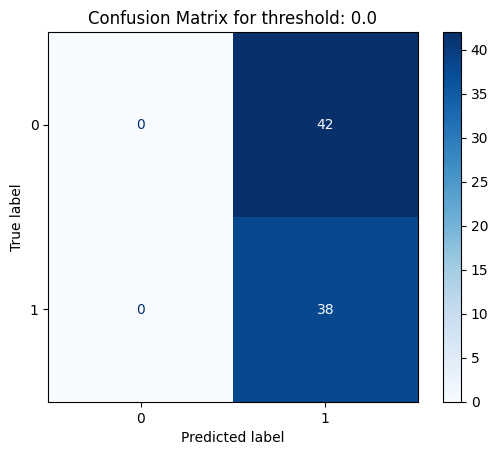

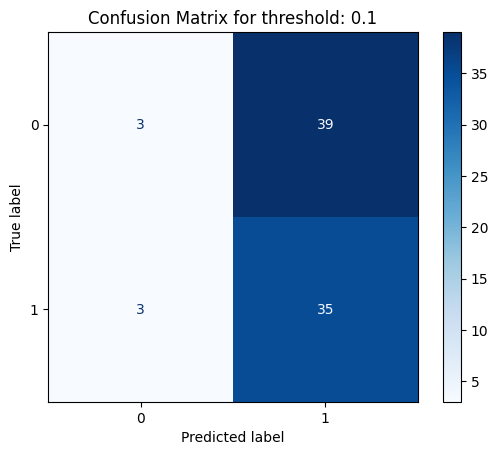

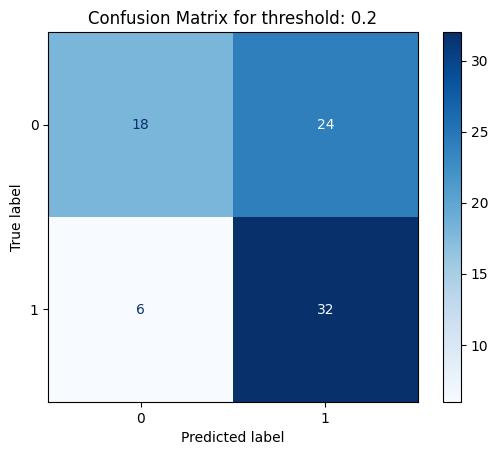

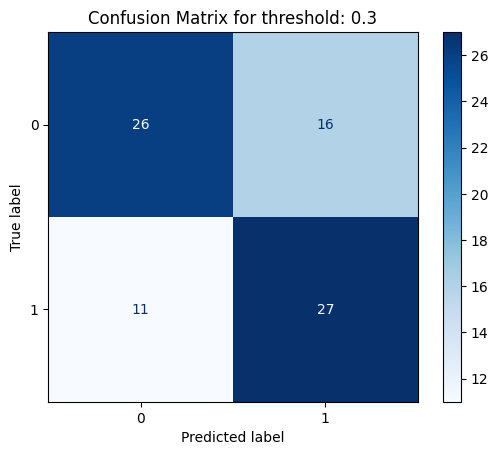

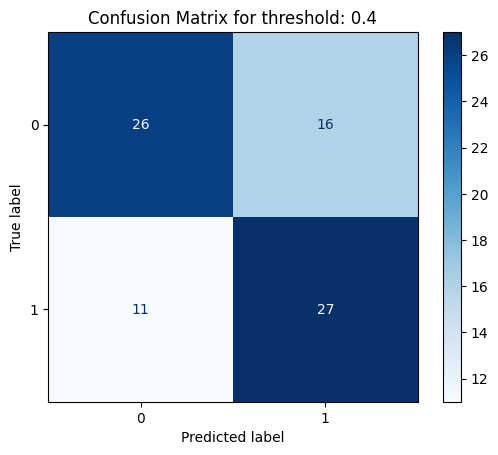

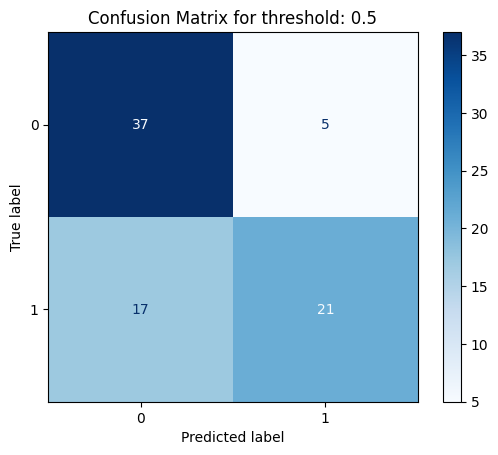

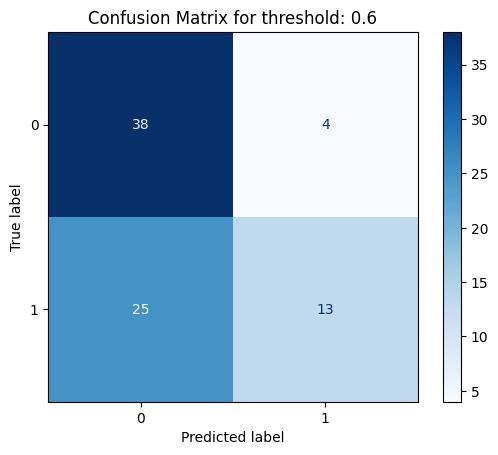

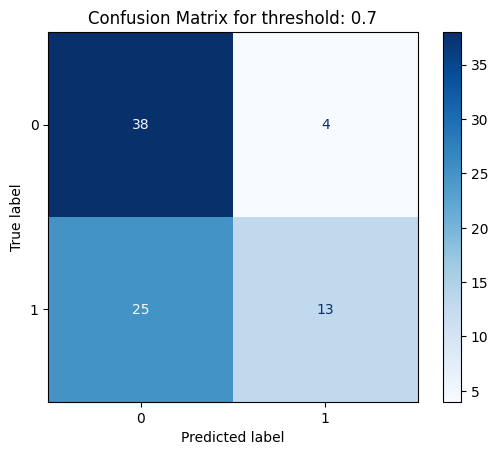

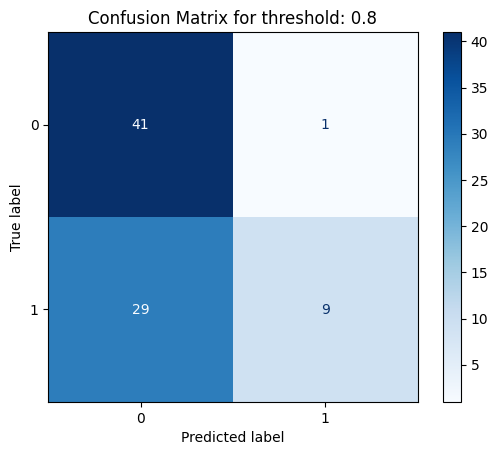

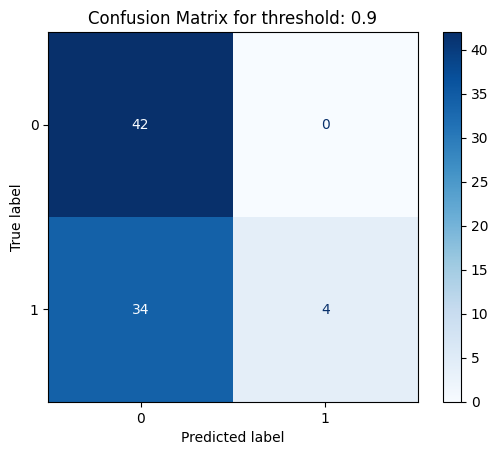

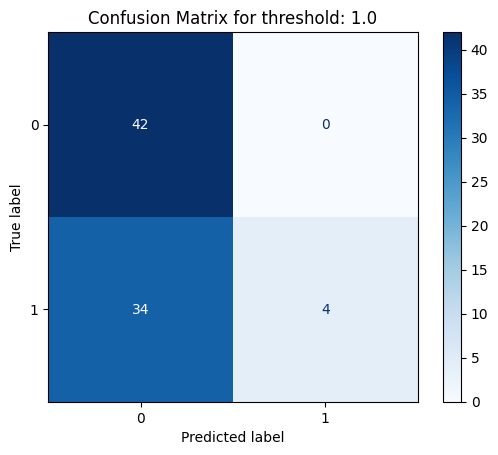

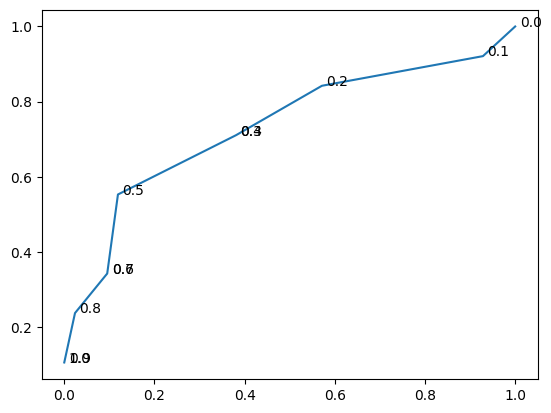

In [25]:
# Calculate FPR and TPR
tpr = []
fpr = []
threshold = []
for i in np.linspace(0,1,11):
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train)
    threshold.append(i)
    fpr_tpr(knn,i)
roc_cods = pd.DataFrame({'Threshold':threshold,'fpr':fpr, 'tpr':tpr})
plt.plot(roc_cods['fpr'],roc_cods['tpr'])
for i in range(0,11):
    plt.annotate(text = np.round(threshold[i],1), xy = (fpr[i]+0.01,tpr[i]) )
plt.show()

<li><b>RUC - Receiver operating characteristic curve: </b> This is a graph indicating the performance of a classification model at all classification thresholds.</li>
<li><b>TPR:</b> This is a metric indicating the reliability of model while predicting True Positives or how correctly the model predicts positive.,aka, <u>RECALL</u> </li>
<li><b>FPR:</b> This is a metric indicating how badly the model predicts positive.</li>

In [29]:
roc_cods

,Threshold,fpr,tpr
0,0.000000,1.000000,1.000000
1,0.100000,0.547619,0.921053
2,0.200000,0.523810,0.921053
3,0.300000,0.119048,0.815789
4,0.400000,0.119048,0.815789
5,0.500000,0.119048,0.815789
6,0.600000,0.119048,0.815789
7,0.700000,0.119048,0.815789
8,0.800000,0.119048,0.815789
9,0.900000,0.095238,0.789474


<p>The graph is drown based on positives predicted in the output for a given threshold. We can observe that when the threshold is 0, the rate of False positives and True positives are highest when the threshold is 0, Since all the rows are marked as positives.</p>
<p>The model starts predicting as the threshold is increased and flattens as the threshold tends to 1. This characteristic curve can be used to find the best k value as in k neighbours in KNN classifier. The curve with maximum <u>AUC(Area under the curve)</u> is the optimum k value.</p>

## Decision Tree Classifier

### 1) Try Decision tree with Gini, Entropy. Do they result in different splits?

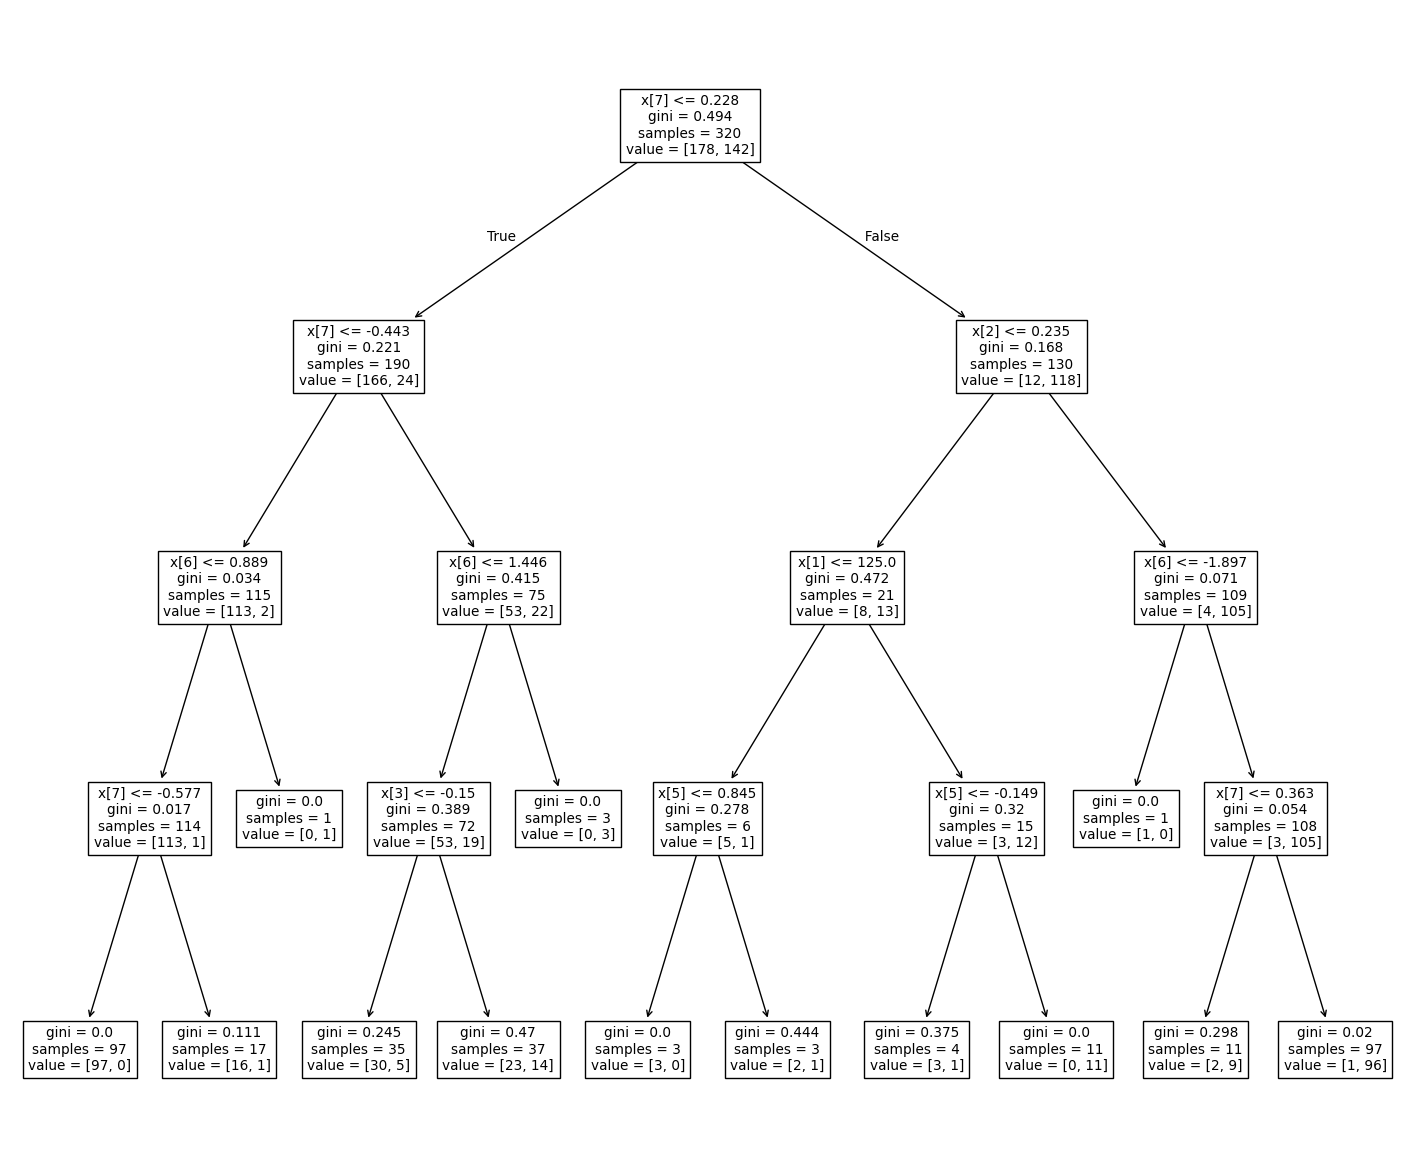

In [14]:
dt = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=4)
dt.fit(X_train, y_train)
plt.figure(figsize=(18, 15))
plot_tree(dt)
plt.show()

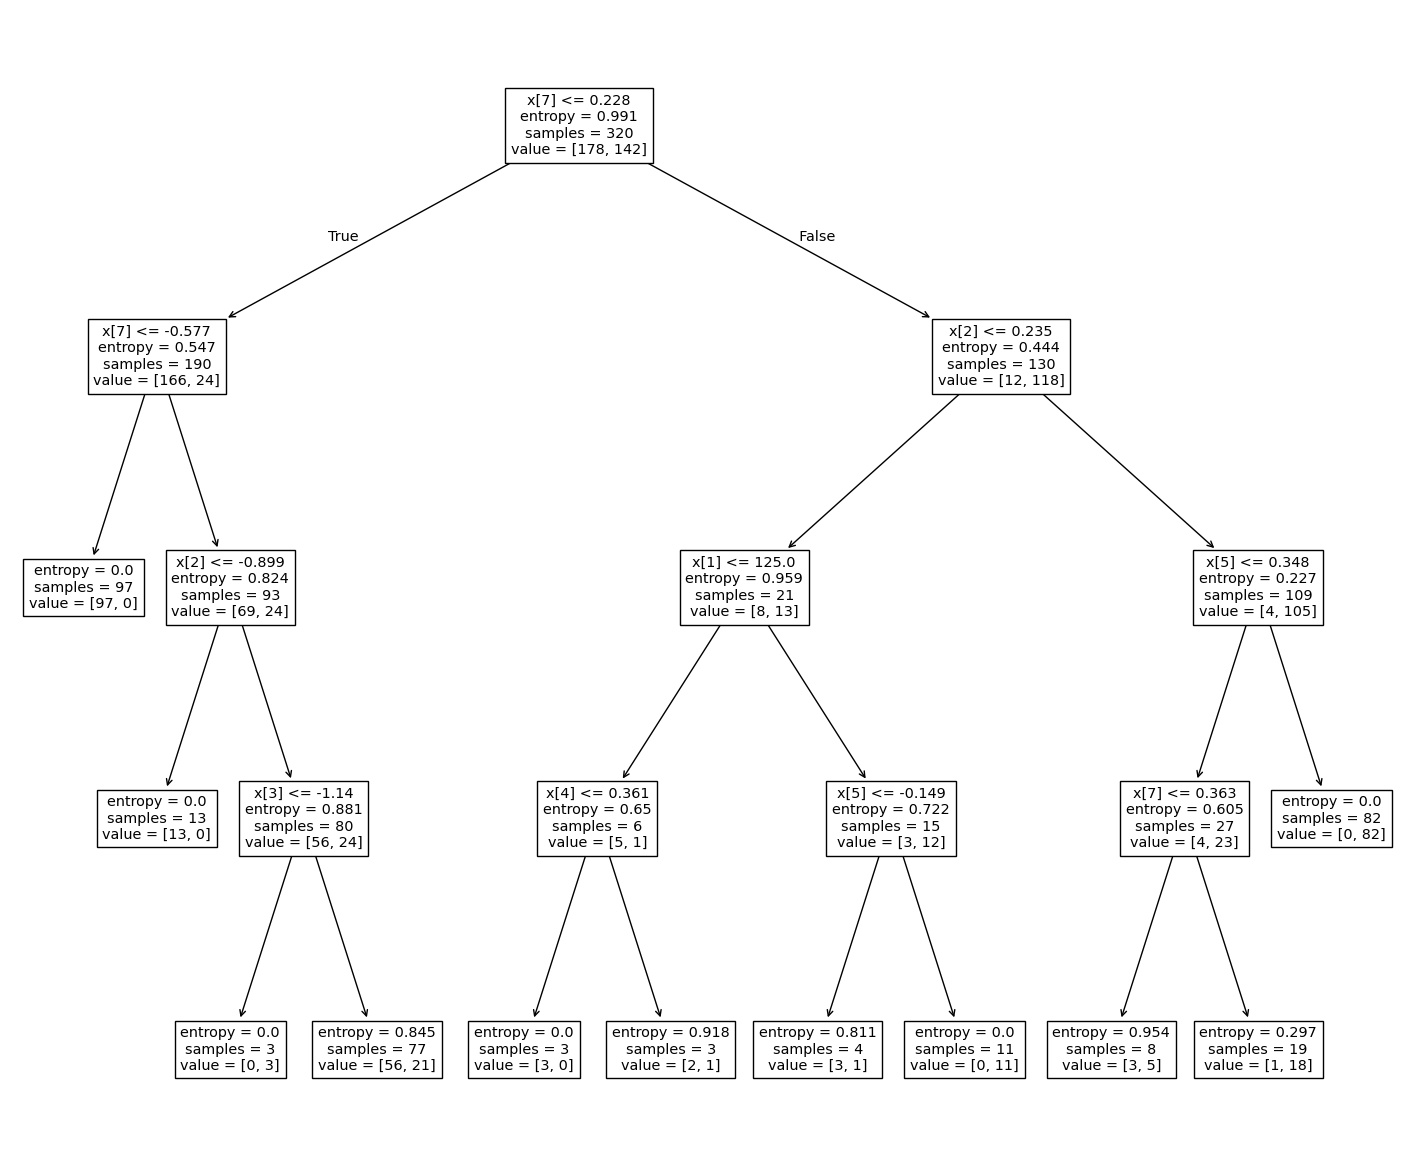

In [15]:
dt = DecisionTreeClassifier(criterion='entropy', splitter='best', random_state=0, max_depth=4)
dt.fit(X_train, y_train)
plt.figure(figsize=(18, 15))
plot_tree(dt)
plt.show()

We can see that there is no difference in splits.

### 2) Try different depths, see effect on train and test performance. (Accuracy, Recall, Precision)

#### Defining functions to generate score cards

In [20]:
dt_depth = []
dt_Precision_Score = []
dt_Recall_Score = []
dt_Accuracy_Score = []

def decision_tree_test_score_card(model, depth):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global dt_depth
    
    global dt_Precision_Score
    global dt_Recall_Score
    global dt_Accuracy_Score

    dt_depth.append(depth)
    dt_Precision_Score.append(metrics.precision_score(y_test, y_pred))
    dt_Recall_Score.append(metrics.recall_score(y_test, y_pred))
    dt_Accuracy_Score.append(metrics.accuracy_score(y_test, y_pred))

In [21]:
dt_depth_train = []
dt_Precision_Score_train = []
dt_Recall_Score_train = []
dt_Accuracy_Score_train = []

def decision_tree_train_score_card(model, depth):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict_proba(X_train)[:,1]

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global dt_depth_train
    
    global dt_Precision_Score_train
    global dt_Recall_Score_train
    global dt_Accuracy_Score_train

    dt_depth_train.append(depth)
    dt_Precision_Score_train.append(metrics.precision_score(y_train, y_pred))
    dt_Recall_Score_train.append(metrics.recall_score(y_train, y_pred))
    dt_Accuracy_Score_train.append(metrics.accuracy_score(y_train, y_pred))

#### Generating score cards

In [22]:
for i in range(1,10):
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=i)
    dt.fit(X_train, y_train)
    decision_tree_test_score_card(dt,i)
    
score = pd.DataFrame({
    'Depth':dt_depth,
    'Precision_Score':dt_Precision_Score,
    'Recall_Score':dt_Recall_Score,
    'Accuracy_Score':dt_Accuracy_Score
    })

score

,Depth,Precision_Score,Recall_Score,Accuracy_Score
0,1,0.861111,0.815789,0.850000
1,2,0.861111,0.815789,0.850000
2,3,0.861111,0.815789,0.850000
3,4,0.861111,0.815789,0.850000
4,5,0.846154,0.868421,0.862500
5,6,0.767442,0.868421,0.812500
6,7,0.804878,0.868421,0.837500
7,8,0.800000,0.842105,0.825000
8,9,0.800000,0.842105,0.825000


In [23]:
for i in range(1,10):
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=0, max_depth=i)
    dt.fit(X_train, y_train)
    decision_tree_train_score_card(dt,i)
    
score_train = pd.DataFrame({
    'Depth':dt_depth_train,
    'Precision_Score':dt_Precision_Score_train,
    'Recall_Score':dt_Recall_Score_train,
    'Accuracy_Score':dt_Accuracy_Score_train
    })

score_train

,Depth,Precision_Score,Recall_Score,Accuracy_Score
0,1,0.907692,0.830986,0.887500
1,2,0.907692,0.830986,0.887500
2,3,0.952756,0.852113,0.915625
3,4,0.975610,0.845070,0.921875
4,5,0.984252,0.880282,0.940625
5,6,0.950704,0.950704,0.956250
6,7,0.978571,0.964789,0.975000
7,8,0.992908,0.985915,0.990625
8,9,1.000000,1.000000,1.000000


#### Train scores vs Test scores
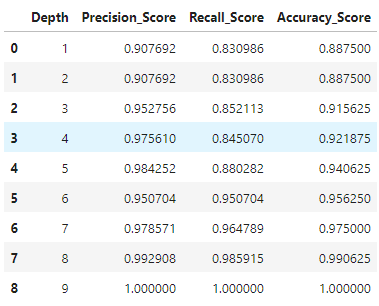
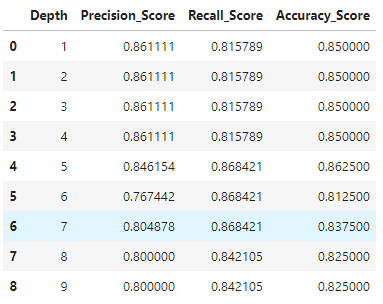

The model tends to overfit as the depth of the tree increases as the complexity of the model is increased resulting in high variance. 

### 3)Use predict_proba, threshold to get confusion matrix and ROC curve.

#### Defining function to generate CM.

In [26]:

def fpr_tpr(model, threshold):
    global tpr
    global fpr
    y_pred_proba = model.predict_proba(X_test)[:,1]
    y_pred = [1 if i >= threshold else 0 for i in y_pred_proba]
    con_mat = metrics.confusion_matrix(y_test, y_pred)
    tpr.append(con_mat[1,1]/(con_mat[1,1]+con_mat[1,0]))
    fpr.append(con_mat[0,1]/(con_mat[0,1]+con_mat[0,0]))
    disp = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred))
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for threshold: {np.round(threshold,2)}')
    plt.show()

#### Generating ROC curve and CM

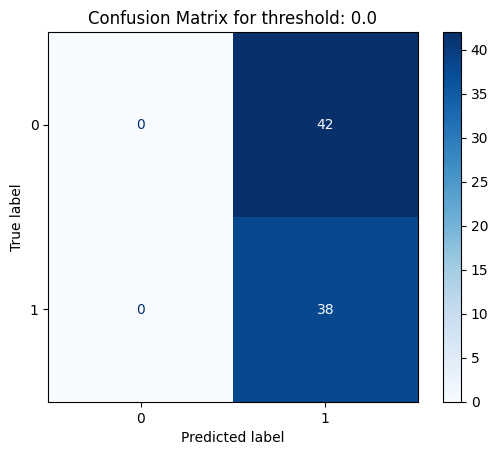

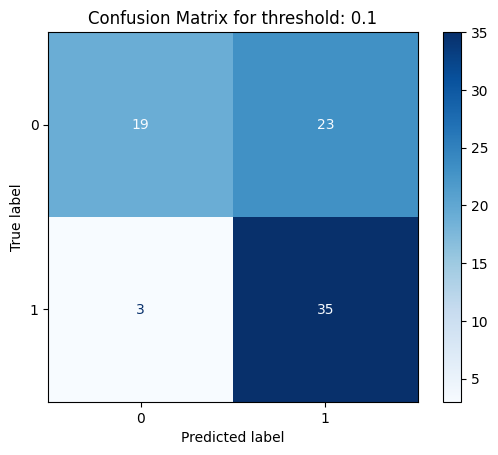

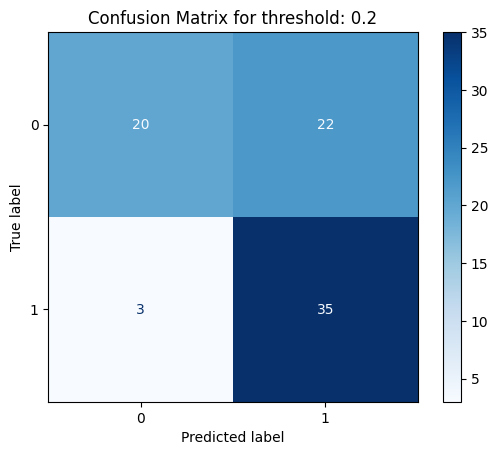

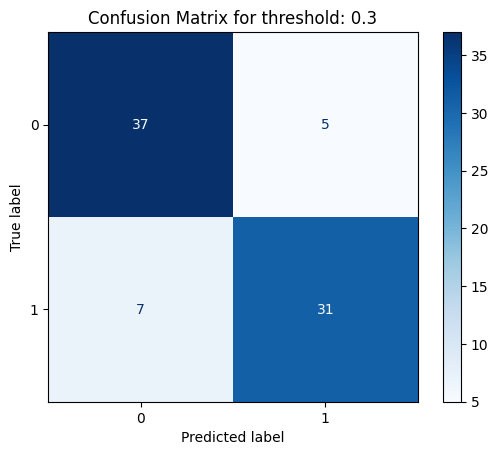

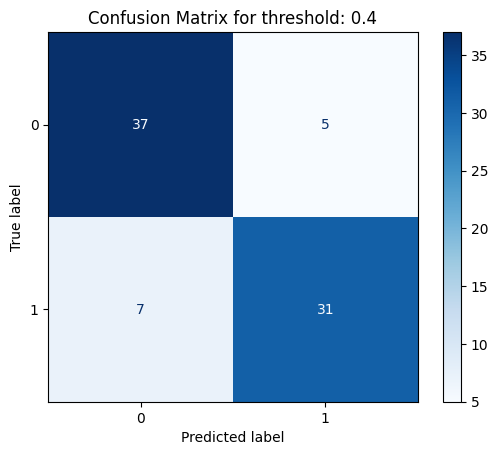

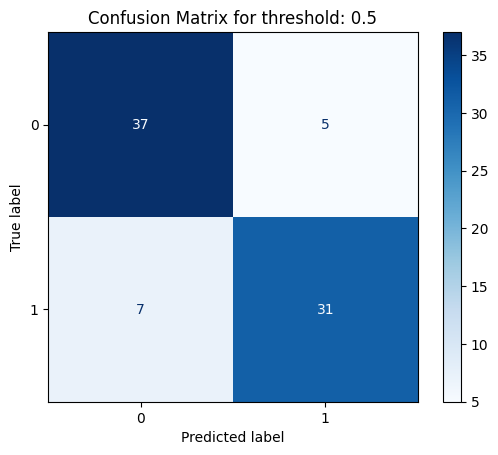

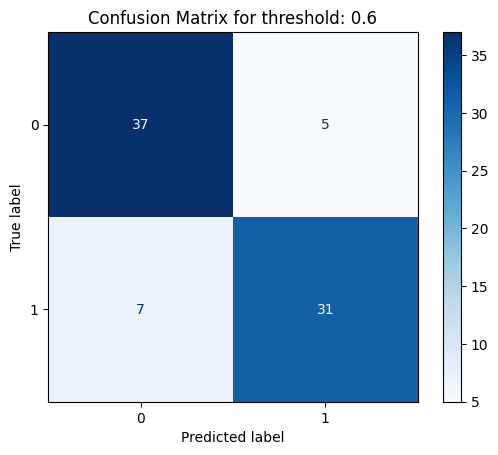

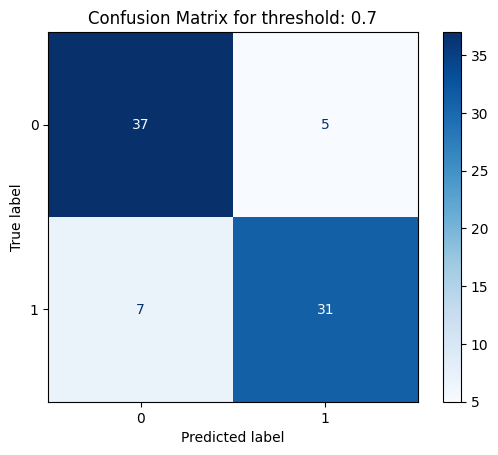

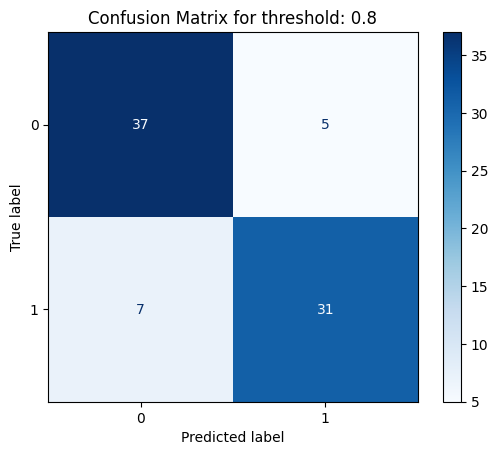

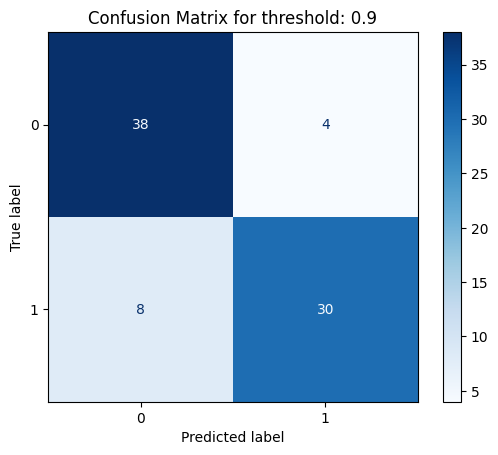

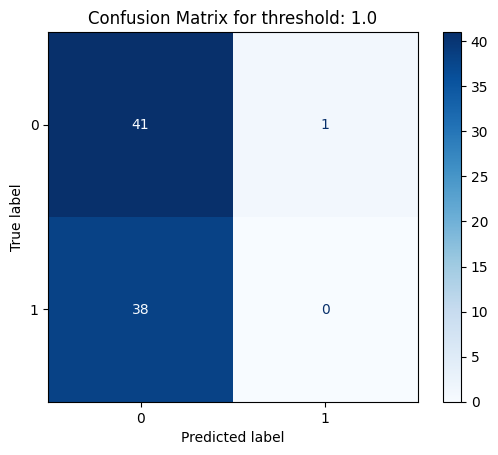

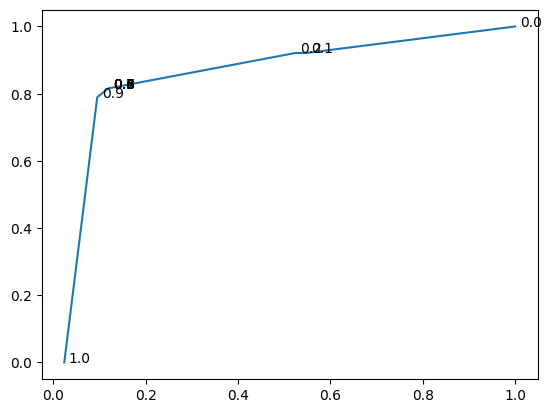

In [28]:
# Calculate FPR and TPR
tpr = []
fpr = []
threshold = []
for i in np.linspace(0,1,11):
    dt = DecisionTreeClassifier(max_depth=3)
    dt.fit(X_train,y_train)
    threshold.append(i)
    fpr_tpr(dt,i)
roc_cods = pd.DataFrame({'Threshold':threshold,'fpr':fpr, 'tpr':tpr})
plt.plot(roc_cods['fpr'],roc_cods['tpr'])
for i in range(0,11):
    plt.annotate(text = np.round(threshold[i],1), xy = (fpr[i]+0.01,tpr[i]) )
plt.show()

In [30]:
roc_cods

,Threshold,fpr,tpr
0,0.000000,1.000000,1.000000
1,0.100000,0.547619,0.921053
2,0.200000,0.523810,0.921053
3,0.300000,0.119048,0.815789
4,0.400000,0.119048,0.815789
5,0.500000,0.119048,0.815789
6,0.600000,0.119048,0.815789
7,0.700000,0.119048,0.815789
8,0.800000,0.119048,0.815789
9,0.900000,0.095238,0.789474


From the ROC curve above we can conclude that a threshold of 0.3 to 0.8 can be chosen for a max depth of the decision tree of 3, as the TPR is high and also FPR is lower.

### 4)Try different thresholds, observe impact on precision, Recall, F1 score

#### Defining functions for generating score card

In [41]:
threshold_dt = []
Precision_Score_dt = []
Recall_Score_dt = []
f1_score_dt = []

def dt_test_score_card(model, t):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < t else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global threshold_dt
    global Precision_Score_dt
    global Recall_Score_dt
    global f1_score_dt

    threshold_dt.append(t)
    Precision_Score_dt.append(metrics.precision_score(y_test, y_pred))
    Recall_Score_dt.append(metrics.recall_score(y_test, y_pred))
    f1_score_dt.append(metrics.f1_score(y_test, y_pred))
    

In [42]:
threshold_dt_train = []
Precision_Score_dt_train = []
Recall_Score_dt_train = []
f1_score_dt_train = []

def dt_train_score_card(model, t):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict_proba(X_train)[:,1]

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < t else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global threshold_dt_train
    global Precision_Score_dt_train
    global Recall_Score_dt_train
    global f1_score_dt_train

    threshold_dt_train.append(t)
    Precision_Score_dt_train.append(metrics.precision_score(y_train, y_pred))
    Recall_Score_dt_train.append(metrics.recall_score(y_train, y_pred))
    f1_score_dt_train.append(metrics.f1_score(y_train, y_pred))
    

#### Generating score cards:

In [43]:
# train score card

for i in np.linspace(0,1,11):
    dt = DecisionTreeClassifier(max_depth=3)
    dt.fit(X_train,y_train)
    dt_test_score_card(dt, i)
q2_score_card = pd.DataFrame({'threshold': threshold_dt,
                                    'Precision Score': Precision_Score_dt,
                                    'Recall Score': Recall_Score_dt,
                                    'f1-score': f1_score_dt })
q2_score_card

,threshold,Precision Score,Recall Score,f1-score
0,0.000000,0.475000,1.000000,0.644068
1,0.100000,0.603448,0.921053,0.729167
2,0.200000,0.614035,0.921053,0.736842
3,0.300000,0.861111,0.815789,0.837838
4,0.400000,0.861111,0.815789,0.837838
5,0.500000,0.861111,0.815789,0.837838
6,0.600000,0.861111,0.815789,0.837838
7,0.700000,0.861111,0.815789,0.837838
8,0.800000,0.861111,0.815789,0.837838
9,0.900000,0.882353,0.789474,0.833333


In [44]:
# train score card

for i in np.linspace(0,1,11):
    dt = DecisionTreeClassifier(max_depth=3)
    dt.fit(X_train,y_train)
    dt_train_score_card(dt, i)
score_card_train = pd.DataFrame({'threshold': threshold_dt_train,
                                    'Precision Score': Precision_Score_dt_train,
                                    'Recall Score': Recall_Score_dt_train,
                                    'f1-score': f1_score_dt_train })
score_card_train

,threshold,Precision Score,Recall Score,f1-score
0,0.000000,0.443750,1.000000,0.614719
1,0.100000,0.687805,0.992958,0.812680
2,0.200000,0.703518,0.985915,0.821114
3,0.300000,0.952756,0.852113,0.899628
4,0.400000,0.952756,0.852113,0.899628
5,0.500000,0.952756,0.852113,0.899628
6,0.600000,0.952756,0.852113,0.899628
7,0.700000,0.952756,0.852113,0.899628
8,0.800000,0.952756,0.852113,0.899628
9,0.900000,0.973214,0.767606,0.858268


### 5) Classification report: Check the metrics by calculating. 

#### fitting the model and generating classification report using sklearn 

In [47]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.86      0.82      0.84        38

    accuracy                           0.85        80
   macro avg       0.85      0.85      0.85        80
weighted avg       0.85      0.85      0.85        80



#### Generating classification report by calculating

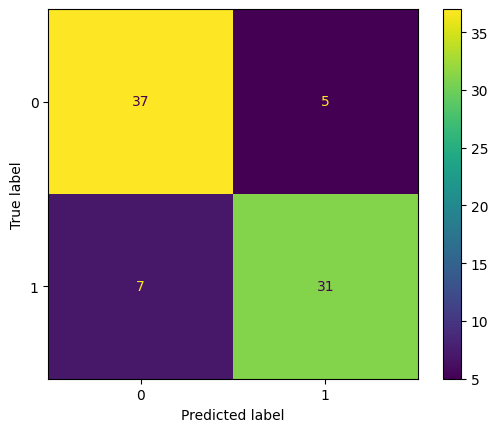

In [57]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
disp.plot()
plt.show()

In [71]:
TN = 37
TP = 31
FN = 7
FP = 5

# Calculation for Precision
Precision_for_P = TP/(TP+FP)
Precision_for_N = TN/(TN+FN)

# Calculation for Recall
Recall_for_P = TP/(TP+FN)
Recall_for_N = TN/(TN+FP)

# Calculation for F1-score
F1_score_for_P = 2*(Precision_for_P*Recall_for_P)/(Precision_for_P+Recall_for_P)
F1_score_for_N = 2*(Precision_for_N*Recall_for_N)/(Precision_for_N+Recall_for_N)

# Calculation of accuracy
Accuracy = (TP+TN)/(TP+TN+FP+FN)

# Calculation of Average
Macro_average_for_Precision = (Precision_for_N + Precision_for_P)/2
Weighed_average_for_Precision = (42*Precision_for_N + 38*Precision_for_P)/80

Macro_average_for_Recall = (Recall_for_N + Recall_for_P)/2
Weighed_average_for_Recall = (42*Recall_for_N + 38*Recall_for_P)/80

Macro_average_for_F1_score = (F1_score_for_N + F1_score_for_P)/2
Weighed_average_for_F1_score = (42*F1_score_for_N + 38*F1_score_for_P)/80

#Printing score card

Precision = np.array([Precision_for_N, Precision_for_P, np.nan, Macro_average_for_Precision, Weighed_average_for_Precision])
Recall = np.array([Recall_for_N, Recall_for_P, np.nan, Macro_average_for_Recall, Weighed_average_for_Recall])
F1_score = np.array([F1_score_for_N, F1_score_for_P, Accuracy, Macro_average_for_F1_score, Weighed_average_for_F1_score])
Support = np.array([TN+FP, TP+FN, 80, 80, 80])

calcualted_score_card = pd.DataFrame({'Precision':Precision,'Recall':Recall, 'F1_score':F1_score, 'Support':Support}, index=[0,1,'Accuracy', 'Macro average', 'Weighed average'])

#### Calculated score card

In [72]:
calcualted_score_card

,Precision,Recall,F1_score,Support
0,0.840909,0.880952,0.860465,42
1,0.861111,0.815789,0.837838,38
Accuracy,NaN,NaN,0.850000,80
Macro average,0.851010,0.848371,0.849151,80
Weighed average,0.850505,0.850000,0.849717,80


----------------

## Importing Dataset

In [77]:
df = pd.read_csv('Fish Weight Prediction Dataset.csv').drop(columns='Species')
df.head()

,Category,Weight,Height,Width,Length1,Length2,Length3
0,1,242.000000,11.520000,4.020000,23.200000,25.400000,30.000000
1,1,290.000000,12.480000,4.305600,24.000000,26.300000,31.200000
2,1,340.000000,12.377800,4.696100,23.900000,26.500000,31.100000
3,1,363.000000,12.730000,4.455500,26.300000,29.000000,33.500000
4,1,430.000000,12.444000,5.134000,26.500000,29.000000,34.000000


In [78]:
X = df.drop(columns='Weight')
df_target = df['Weight']
df_target.head()

0   242.000000
1   290.000000
2   340.000000
3   363.000000
4   430.000000
Name: Weight, dtype: float64

In [79]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (127, 7)
y_train (127,)
X_test (32, 7)
y_test (32,)


## KNN Regressor

### 1) Low K leads to high variance or Overfitting and High K leads to High Bias or Underfitting [Effect of K] 

#### Defining Function to generate score card

In [106]:
k = []
R2 = []

def update_test_score_card(model, neighbour):

    # let 'y_pred_prob' be the predicted values of y
    y_pred = model.predict(X_test)
    
    # assign 'score_card' as global variable
    global k
    
    global R2

    k.append(neighbour)
    R2.append(metrics.r2_score(y_test, y_pred))



In [107]:
k_train = []
R2_train = []

def update_train_score_card(model, neighbour):

    # let 'y_pred_prob' be the predicted values of y
    y_pred = model.predict(X_train)
    
    # assign 'score_card' as global variable
    global k
    
    global R2

    k_train.append(neighbour)
    R2_train.append(metrics.r2_score(y_train,y_pred))



#### Generating score card

In [108]:
# test score card

for i in range(1,21,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    update_test_score_card(knn, i)
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    update_train_score_card(knn, i)
test_score_card = pd.DataFrame({'K': k,
                                    'R2_score' : R2 })
train_score_card = pd.DataFrame({'K': k_train,
                                    'R2_score' : R2_train })
train_score_card

,K,R2_score
0,1,0.999862
1,2,0.988799
2,3,0.983266
3,4,0.984311
4,5,0.974561
5,6,0.960544
6,7,0.939095
7,8,0.919103
8,9,0.911331
9,10,0.904510


In [109]:
test_score_card

,K,R2_score
0,1,0.905004
1,2,0.948761
2,3,0.927217
3,4,0.907914
4,5,0.895836
5,6,0.878399
6,7,0.848678
7,8,0.820078
8,9,0.814203
9,10,0.811827


We can observe that the model is overfit when the K value is low. but as the k increases the r2 difference between test and train is reduced.

### 2) Use few features, Use many features and try fitting a KNN model [Effect of hyperdimension]

#### Building model on existing features

In [133]:
knn = KNeighborsRegressor(n_neighbors=16)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
metrics.r2_score(y_test, y_pred)

0.7937117857341378

#### Adding insignificant features to observe the effect of hyperdimension

In [153]:
X_train_new = X_train.copy()
X_train_new['extra1'] = X_train['Width']**(1/2)
X_train_new['extra2'] = X_train['Length2']**(2)

X_test_new = X_test.copy()
X_test_new['extra1'] = X_test['Width']**(1/2)
X_test_new['extra2'] = X_test['Length2']**(2)

X_test_new

,const,Category,Height,Width,Length1,Length2,Length3,extra1,extra2
35,1.000000,5,4.147200,2.268000,12.900000,14.100000,16.200000,1.505988,198.810000
85,1.000000,3,6.384000,3.534000,19.300000,21.300000,22.800000,1.879894,453.690000
47,1.000000,5,6.400000,3.800000,21.100000,22.500000,25.000000,1.949359,506.250000
24,1.000000,1,16.240500,5.589000,31.900000,35.000000,40.500000,2.364107,1225.000000
129,1.000000,4,5.707800,4.158000,31.700000,34.000000,37.800000,2.039117,1156.000000
95,1.000000,3,6.275000,3.725000,21.500000,23.500000,25.000000,1.930026,552.250000
128,1.000000,4,5.568000,3.375600,30.000000,32.300000,34.800000,1.837281,1043.290000
10,1.000000,1,14.262800,5.104200,28.400000,31.000000,36.200000,2.259248,961.000000
58,1.000000,7,10.744000,6.562000,28.500000,31.000000,34.000000,2.561640,961.000000
104,1.000000,3,7.051600,4.335000,25.400000,27.500000,28.900000,2.082066,756.250000


#### Building model on dataset with insignificant features

In [155]:
knn = KNeighborsRegressor(n_neighbors=16)
knn.fit(X_train_new,y_train)
y_pred = knn.predict(X_test_new)
metrics.r2_score(y_test, y_pred)

0.6573219638520816

We can observe that adding insignificant variables did not help the model. more features does not always mean better model. Only the most significant features must be used for model building. 

### 3) Check R2 score = SSR/SST does not hold good for KNN model. 

In [168]:
knn = KNeighborsRegressor(n_neighbors=16)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('R2 using sklearn: ',metrics.r2_score(y_test, y_pred))

SSR = ((y_test.mean() - y_pred)**2)
SST = (y_test.mean() - y_test)**2
SSE = ((y_test - y_pred)**2)

print('1 - (SSE/SST) = ',1-(SSE.sum()/SST.sum()))
print('SSR/SST = ',SSR.sum()/SST.sum())

R2 using sklearn:  0.7937117857341378
1 - (SSE/SST) =  0.7937117857341378
SSR/SST =  1.296109917854316


Hence, We can conclude that R2 = 1 - (SSE/SST) != SSR/SST for KNN Regressor.

## DT Regressor

### 1) Check R2 score = SSR/SST does not hold good for DT model.

In [170]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('R2 using sklearn: ',metrics.r2_score(y_test, y_pred))

SSR = ((y_test.mean() - y_pred)**2)
SST = (y_test.mean() - y_test)**2
SSE = ((y_test - y_pred)**2)

print('1 - (SSE/SST) = ',1-(SSE.sum()/SST.sum()))
print('SSR/SST = ',SSR.sum()/SST.sum())

R2 using sklearn:  0.9187090266838768
1 - (SSE/SST) =  0.9187090266838768
SSR/SST =  1.1899419706125731


Hence, We can conclude that R2 = 1 - (SSE/SST) != SSR/SST for Decision Tree Regressor.

### 2) Try different depths, compare train and test MSE 

In [172]:
mse_train= []
mse_test= []
for i in range(1,20):
    dt = DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train,y_train)
    mse_test.append(mean_squared_error(y_test, dt.predict(X_test)))
    mse_train.append(mean_squared_error(y_train, dt.predict(X_train)))

scores = pd.DataFrame({'mse_train':mse_train, 'mse_test':mse_test})
scores

,mse_train,mse_test
0,41401.054426,29748.798281
1,15764.219295,20126.747708
2,6521.993013,9324.568037
3,2695.195273,3432.918819
4,1183.839729,2761.424891
5,594.108339,2378.606264
6,245.892165,3796.629605
7,83.003982,3463.223910
8,31.869869,2507.040174
9,14.406877,2949.736493


We can observe that, for depth=1, The model has high bias as the MSE is too high. and for a depth more than 5 the model variance increases as the MSE of train is low but the MSE for Test is high. The model is Overfit. We must use the appropriate depth is fit the right model.